<a href="https://colab.research.google.com/github/Aboubacar2012/Deep-Learning-Training/blob/main/DL_Visualize_Model_Training_History_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Visualize Model Training History in Keras

In [2]:
# Import the necessaries libraries
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Fix random seed for reproducibility
seed=7
np.random.seed(seed)

In [5]:
# Load the dataset 
dataframe=pd.read_csv('/content/drive/MyDrive/ml_data/DeepLearning/diabetes.csv')
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Split into input(X) and output (Y) variables
dataset=dataframe.values
X=dataset[:,0:8]
Y=dataset[:,8]

In [7]:
# Create model
model=Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform',
                activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [8]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [9]:
# Fit the model 
history=model.fit(X, Y, validation_split=0.33, epochs=150,
                  batch_size=10, verbose=0)

In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


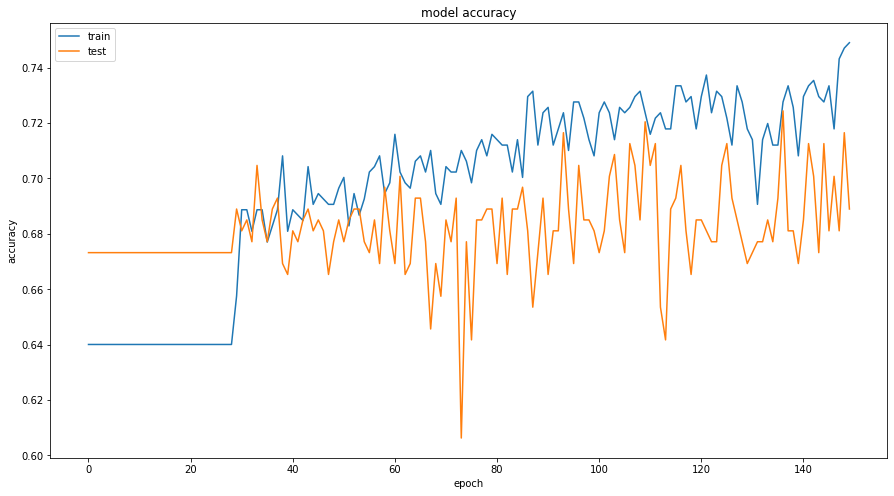

In [14]:
# Summary history for accuracy
plt.figure(figsize=(15,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

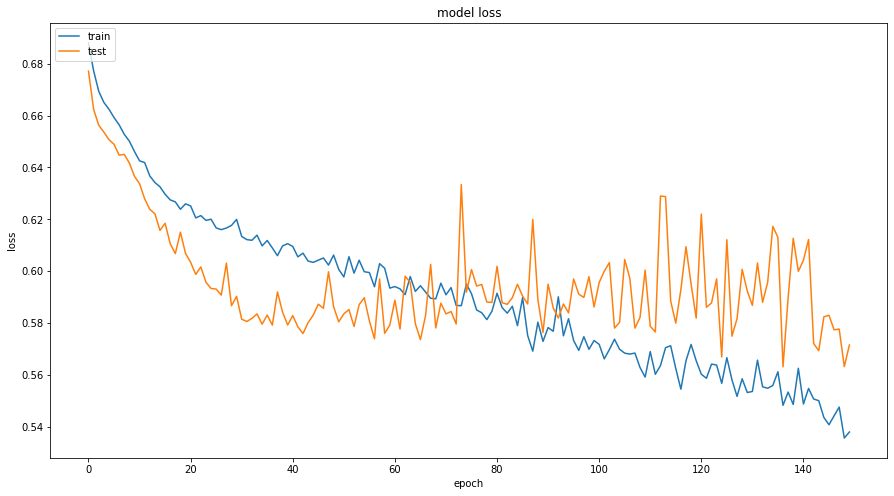

In [15]:
# Summarize history for loss
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()